In [1]:
from facade_project.show import show_img, show_channels, show_labeled_img

# Labelme

In [2]:
from facade_project import FACADE_LABELME_ORIGINAL_DIR
from facade_project.data import FacadeLabelmeDataset

In [3]:
labelme_dataset = FacadeLabelmeDataset(FACADE_LABELME_ORIGINAL_DIR)

In [4]:
img, mask = labelme_dataset[7]

(2048, 3072, 3)


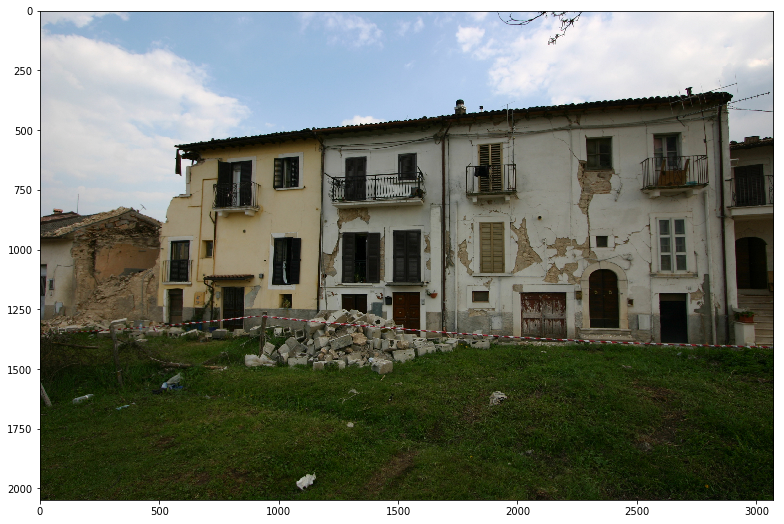

In [5]:
show_img(img)

In [6]:
import numpy as np

mask2 = np.concatenate([
    (mask == 1) * 255 + (mask == 2) * 51 + (mask == 3) * 255,
    (mask == 1) * 51 + (mask == 2) * 255 + (mask == 3) * 255,
    (mask == 1) * 51 + (mask == 2) * 51 + (mask == 3) * 102,
], axis=2)

In [7]:
mask2.shape

(2048, 3072, 3)

(2048, 3072, 3)


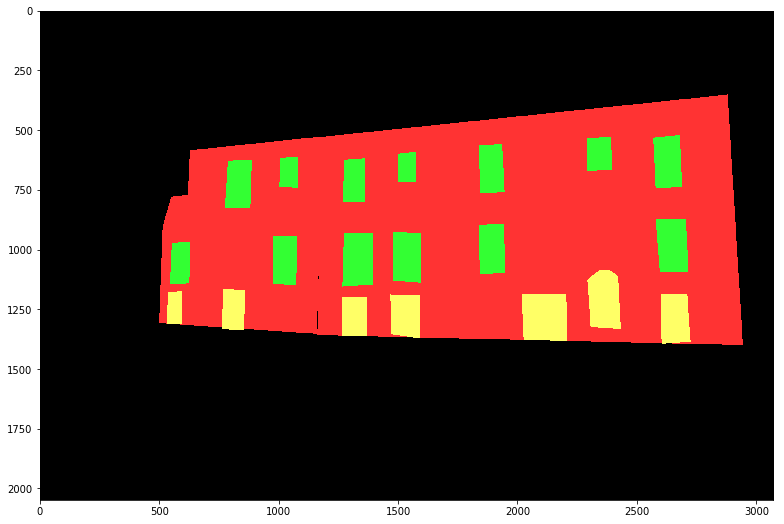

In [8]:
show_img(mask2)

(2048, 3072, 3)


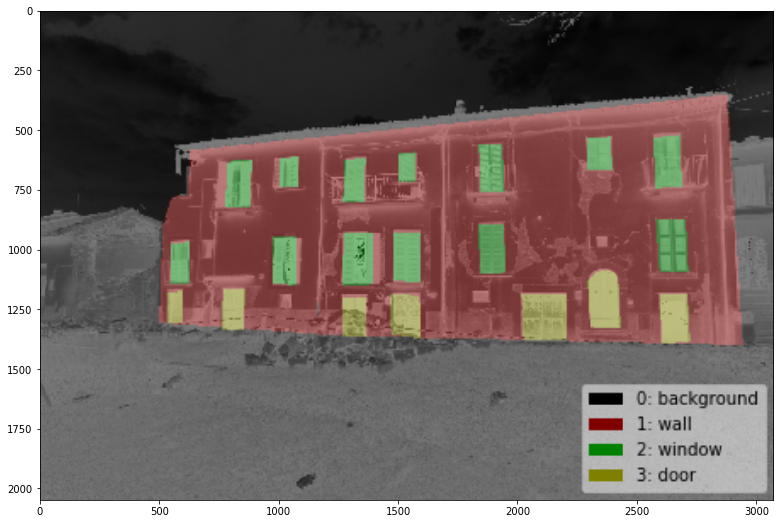

In [9]:
show_labeled_img(img, mask)

# Heatmap

In [10]:
from facade_project.data import FacadeHeatmapDataset

In [11]:
heatmap_dataset = FacadeHeatmapDataset()

In [12]:
img, heatmaps = heatmap_dataset[7]

torch.Size([768, 1024, 3])


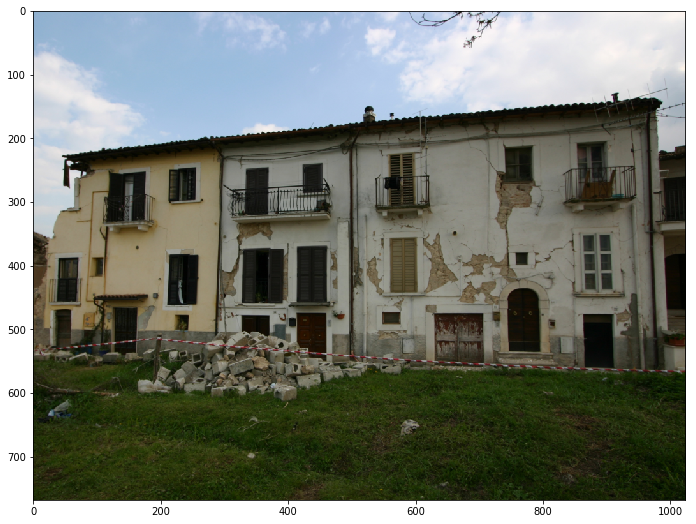

In [13]:
show_img(img)

torch.Size([772, 3080, 3])


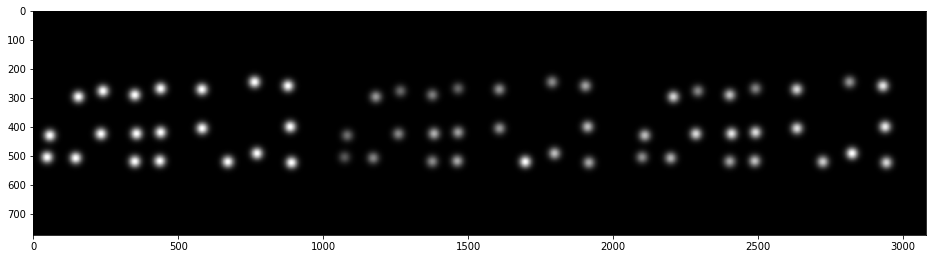

In [14]:
show_channels(heatmaps)

# Random Rotations

notice that for the same call, images are different (rotated and different scale sometimes)

In [15]:
from facade_project.data import FacadeRandomRotDataset

In [16]:
random_rot_dataset = FacadeRandomRotDataset()

In [17]:
img, mask = random_rot_dataset[7]

torch.Size([768, 1024, 3])


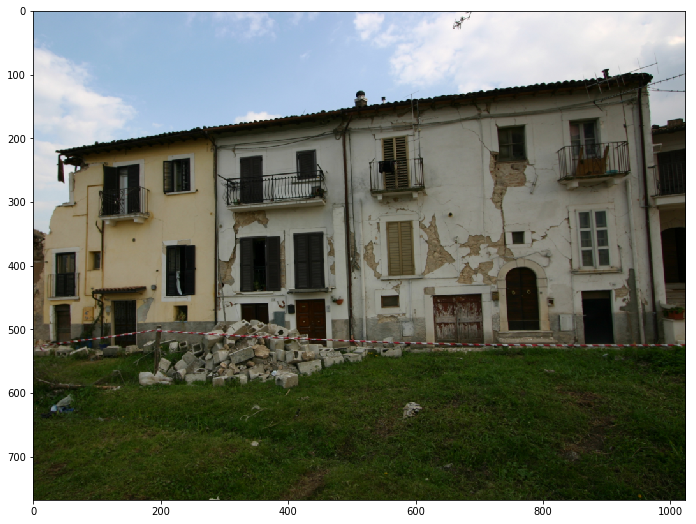

In [18]:
show_img(img)

(768, 1024, 3)


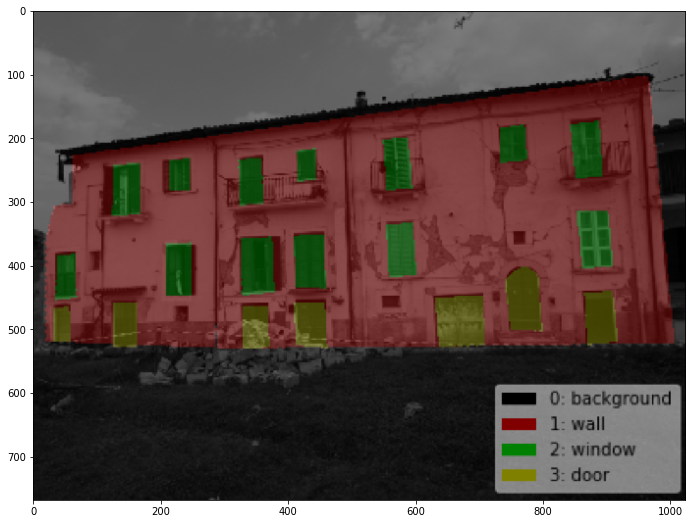

In [19]:
show_labeled_img(img, mask)

In [20]:
img, mask = random_rot_dataset[7]

torch.Size([768, 1024, 3])


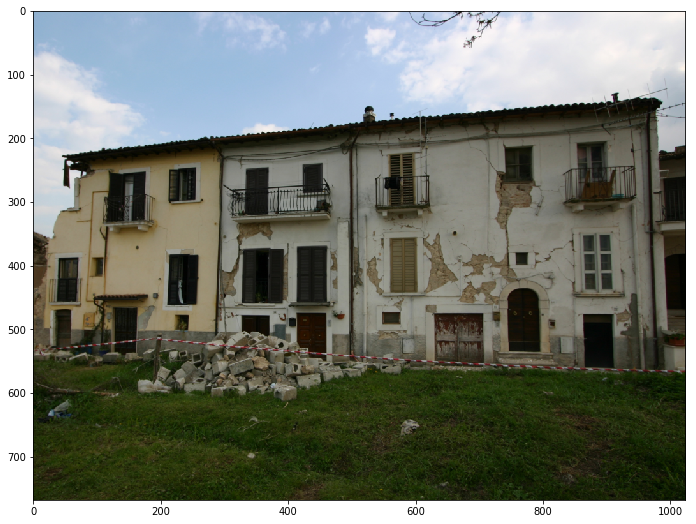

In [21]:
show_img(img)

(768, 1024, 3)


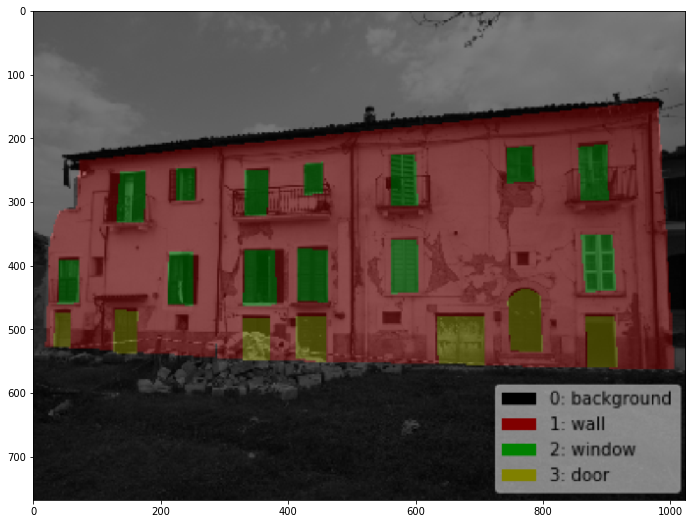

In [22]:
show_labeled_img(img, mask)

# Augmented

In [23]:
from facade_project.data import TransformedDataset
from facade_project.geometry.heatmap import info_to_mask
from facade_project.data.facade_random_rot_dataset import add_heatmaps_target
from facade_project.data.augmentation import random_brightness_and_contrast, random_crop, random_flip, compose

In [37]:
augmentation_tf = compose([
    random_crop(crop_size=768),  # Cropping (for batches of same sizes)
    lambda img, lbl: (random_brightness_and_contrast()(img), lbl),  # Augmentation
    random_flip(),  # Flipping (augmentation)
])

augmented_dataset = TransformedDataset(
    dataset=FacadeRandomRotDataset(add_targets_fn=add_heatmaps_target),
    transform=augmentation_tf,
)

In [38]:
img, targets = augmented_dataset[7]

torch.Size([768, 768, 3])


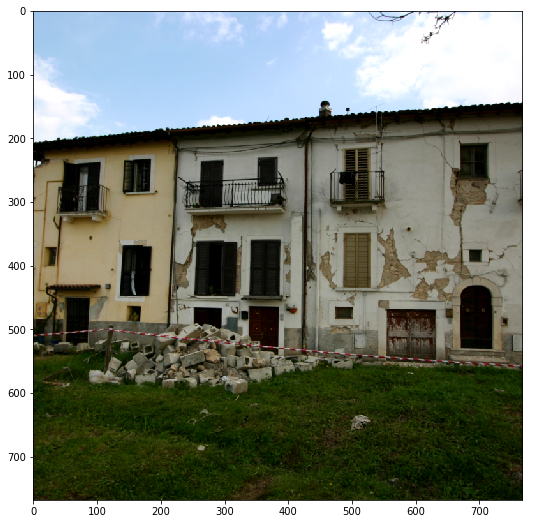

In [39]:
show_img(img)

(768, 768, 3)


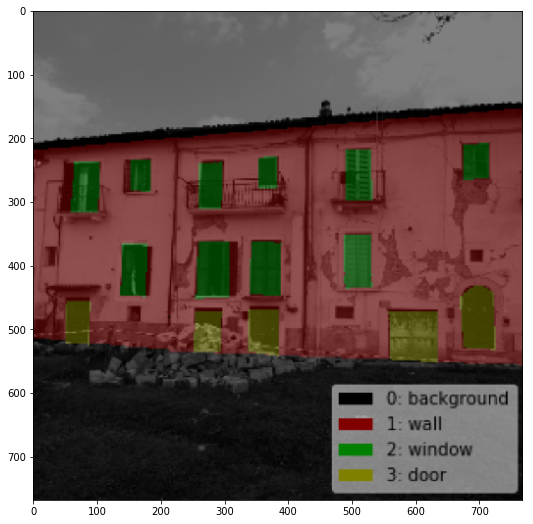

In [40]:
show_labeled_img(img, targets['mask'])

(768, 768, 3)


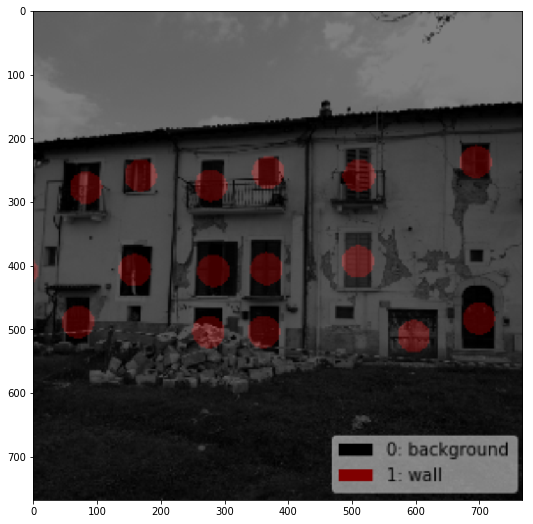

In [41]:
show_labeled_img(img, targets['heatmaps'][0:1] > 0.2)

torch.Size([772, 2312, 3])


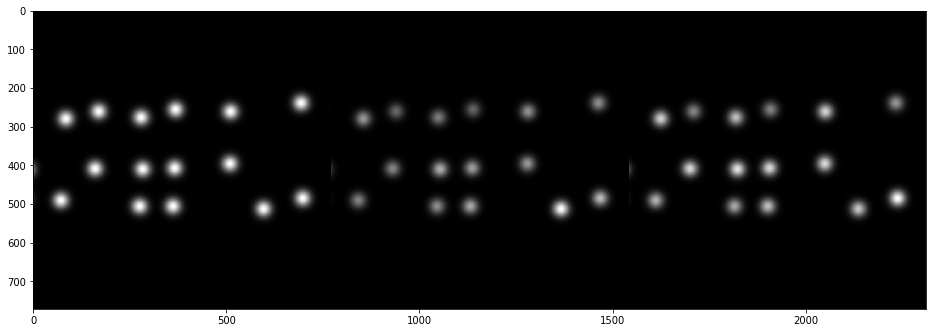

In [42]:
show_channels(targets['heatmaps'])

(768, 768, 3)


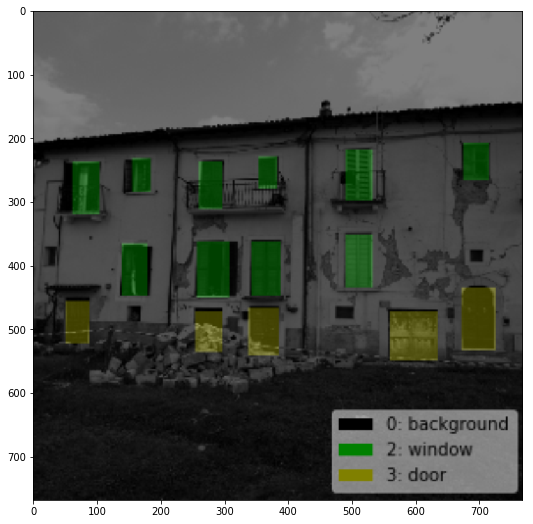

In [43]:
show_labeled_img(img, info_to_mask(targets['heatmaps_info'].info))